# Importing required libraries

In [51]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation
from keras.models import Sequential

# Uploading CSV file 

In [52]:
data = files.upload()

Saving NSE Training Data.csv to NSE Training Data (1).csv


# converting csv file to dataframe

In [53]:
df = pd.read_csv(io.StringIO(data['NSE Training Data.csv'].decode('utf-8')))

# Data inspection..

In [54]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [55]:
df.shape

(1481, 7)

In [56]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03
mean,11190.630103,11243.279798,11114.862019,11180.224847,11180.224847,3.672148e+05
std,2605.404423,2613.649325,2588.183872,2602.005796,2602.005796,2.277599e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,9362.950195,9404.100098,9290.100097,9315.899902,9315.899902,1.956000e+05
50%,10781.849609,10816.349609,10718.750000,10769.150391,10769.150391,2.906000e+05
75%,11925.699707,11968.899903,11847.475097,11914.125000,11914.125000,5.092500e+05
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


# Removing Unnecessary columns

In [57]:
df = df.drop(['Date','Adj Close'], axis=1)

In [58]:
df.head(4)

,Open,High,Low,Close,Volume
0,7924.549805,7937.549805,7781.100098,7791.299805,134700.0
1,7828.399902,7831.200195,7763.250000,7784.649902,145200.0
2,7788.049805,7800.950195,7721.200195,7741.000000,147100.0
3,7673.350098,7674.950195,7556.600098,7568.299805,188900.0


# Checking and filling the null values

In [59]:
df.isnull().sum()

Open      6
High      6
Low       6
Close     6
Volume    6
dtype: int64

In [60]:
df['Open'] = df['Open'].fillna(df['Open'].mean())
df['High'] = df['High'].fillna(df['High'].mean())
df['Low'] = df['Low'].fillna(df['Low'].mean())
df['Close'] = df['Close'].fillna(df['Close'].mean())
df['Volume'] = df['Volume'].fillna(df['Volume'].mean())

In [61]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Visualizing the data on the basis of 'Close' column

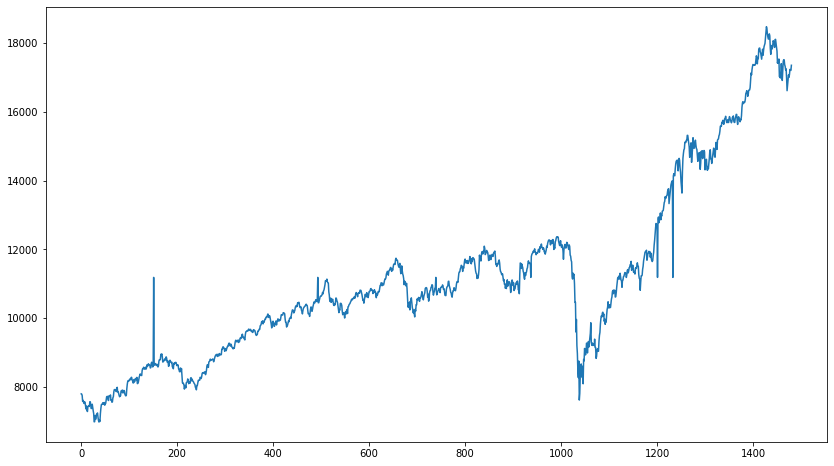

In [62]:
plt.figure(figsize=(14,8))
plt.plot(df.Close)

# Visualizing 30 day moving average of stock prize

In [63]:
mv_avg = df.Close.rolling(30).mean()

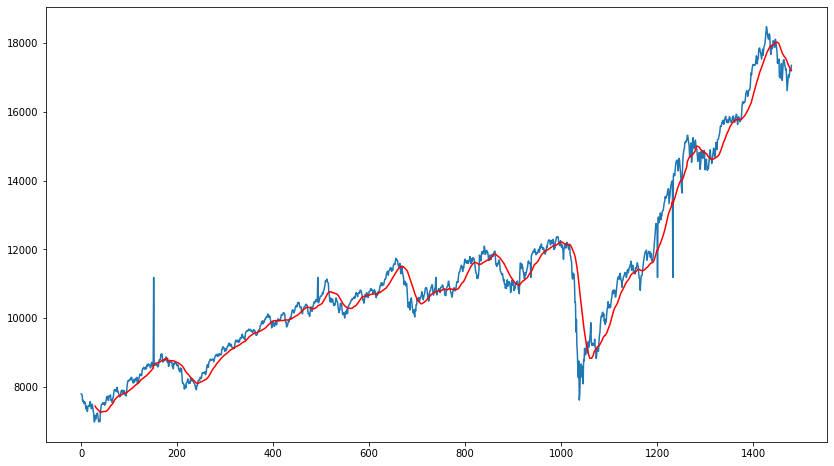

In [64]:
plt.figure(figsize=(14,8))
plt.plot(df.Close)
plt.plot(mv_avg, 'r')

# Splitting the data for training and testing

In [65]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.80): int(len(df))])
print(data_train.shape)
print(data_test.shape)

(1184, 1)
(297, 1)


In [66]:
data_train.head(4)

,Close
0,7791.299805
1,7784.649902
2,7741.000000
3,7568.299805


In [67]:
data_test.head(4)

,Close
1184,11896.450195
1185,11930.349609
1186,11767.750000
1187,11889.400391


# Scaling the data between 0 to 1

In [68]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [69]:
data_train_sc = scalar.fit_transform(data_train)
data_train_sc

array([[0.1522154 ],
       [0.15098204],
       [0.14288628],
       ...,
       [0.90925867],
       [0.91366359],
       [0.92124016]])

# Taking at a time 70 data elements as a 1 step to predict the future price based on the previous step

In [70]:
x_train = []
y_train = []

for i in range(23,data_train_sc.shape[0]):
  x_train.append(data_train_sc[i-23: i])
  y_train.append(data_train_sc[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1161, 23, 1)
(1161,)


# Building the recurrent neural network model

In [71]:
from keras.backend import dropout
from keras.layers.recurrent_v2 import LSTM
model = Sequential()
model.add(LSTM(units=40, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=70, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=80, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=100, activation='relu'))
model.add(Dense(units=1))

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 23, 40)            6720      
                                                                 
 lstm_7 (LSTM)               (None, 23, 50)            18200     
                                                                 
 lstm_8 (LSTM)               (None, 23, 60)            26640     
                                                                 
 lstm_9 (LSTM)               (None, 23, 70)            36680     
                                                                 
 lstm_10 (LSTM)              (None, 23, 80)            48320     
                                                                 
 lstm_11 (LSTM)              (None, 100)               72400     
                                                                 
 dense_1 (Dense)             (None, 1)                

In [73]:
model.compile(optimizer='adam', loss='mean_squared_error')
result = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
37/37 [==============================] - 10s 85ms/step - loss: 0.1453
Epoch 2/15
37/37 [==============================] - 3s 84ms/step - loss: 0.0141
Epoch 3/15
37/37 [==============================] - 3s 83ms/step - loss: 0.0086
Epoch 4/15
37/37 [==============================] - 3s 83ms/step - loss: 0.0072
Epoch 5/15
37/37 [==============================] - 3s 83ms/step - loss: 0.0073
Epoch 6/15
37/37 [==============================] - 3s 83ms/step - loss: 0.0061
Epoch 7/15
37/37 [==============================] - 3s 85ms/step - loss: 0.0061
Epoch 8/15
37/37 [==============================] - 3s 83ms/step - loss: 0.0049
Epoch 9/15
37/37 [==============================] - 3s 83ms/step - loss: 0.0039
Epoch 10/15
37/37 [==============================] - 3s 85ms/step - loss: 0.0038
Epoch 11/15
37/37 [==============================] - 3s 84ms/step - loss: 0.0042
Epoch 12/15
37/37 [==============================] - 3s 84ms/step - loss: 0.0038
Epoch 13/15
37/37 [=================

In [74]:
tail_23_records = data_train.tail(23)

In [75]:
final_test_data = tail_23_records.append(data_test, ignore_index = True)

In [76]:

input_test_data = scalar.fit_transform(final_test_data)


In [77]:
input_test_data.shape

(320, 1)

# Taking at a time 70 data elements as a 1 step to predict the future price based on the previous step for test data

In [78]:
x_test = []
y_test = []

for i in range(23,input_test_data.shape[0]):
  x_test.append(input_test_data[i-23: i])
  y_test.append(input_test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(297, 23, 1)
(297,)


In [79]:
y_pred = model.predict(x_test)

In [80]:
y_pred.shape

(297, 1)

In [81]:
scalar.scale_

array([0.00013035])

# Reverse scalling and visualize the original prize and predicted prize

In [82]:
sc_factor = 1/0.00013035
y_pred = y_pred * sc_factor
y_test = y_test * sc_factor

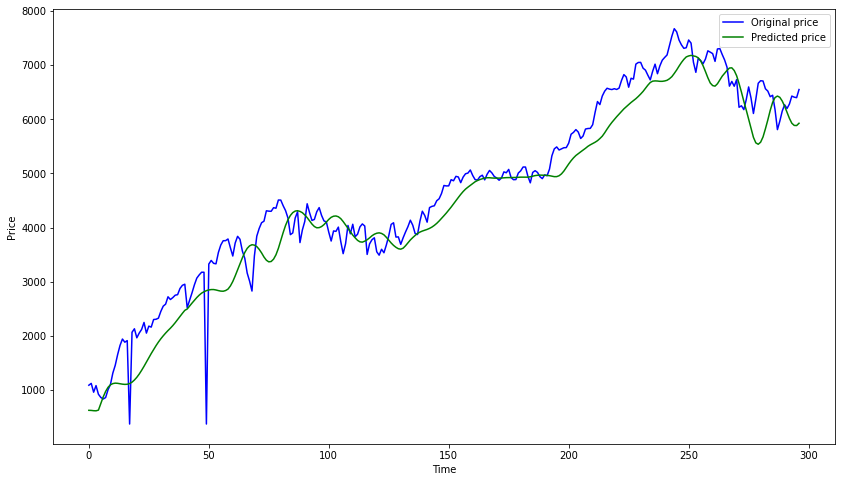

In [83]:
plt.figure(figsize=(14,8))
plt.plot(y_test,'b', label='Original price')
plt.plot(y_pred,'g', label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Testing out of time data

In [84]:
data1 = files.upload()

Saving NSE Out of Time Testing Data.csv to NSE Out of Time Testing Data (1).csv


In [85]:
df1 = pd.read_csv(io.StringIO(data1['NSE Out of Time Testing Data.csv'].decode('utf-8')))

In [86]:
df1.shape

(23, 7)

In [87]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
1,2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2,2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
3,2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
4,2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300


In [88]:
df1_test = pd.DataFrame(df1['Close'])

In [89]:
df1_test.shape

(23, 1)

In [90]:
df1_test_sc = scalar.fit_transform(df1_test)
df1_test_sc

array([[0.43423275],
       [0.58309543],
       [0.68258551],
       [0.53388962],
       [0.58927146],
       [0.74729617],
       [0.79078097],
       [0.92061521],
       [0.95829805],
       [0.95659778],
       [1.        ],
       [0.83828814],
       [0.69348829],
       [0.54309213],
       [0.42714505],
       [0.03909163],
       [0.14591879],
       [0.00679946],
       [0.        ],
       [0.19723941],
       [0.39373232],
       [0.56216106],
       [0.37992775]])

In [ ]:
final_pred = model.predict(df1_test)

In [92]:
df1_test_sc.shape

(23, 1)

# Predicted out of time data prize movement

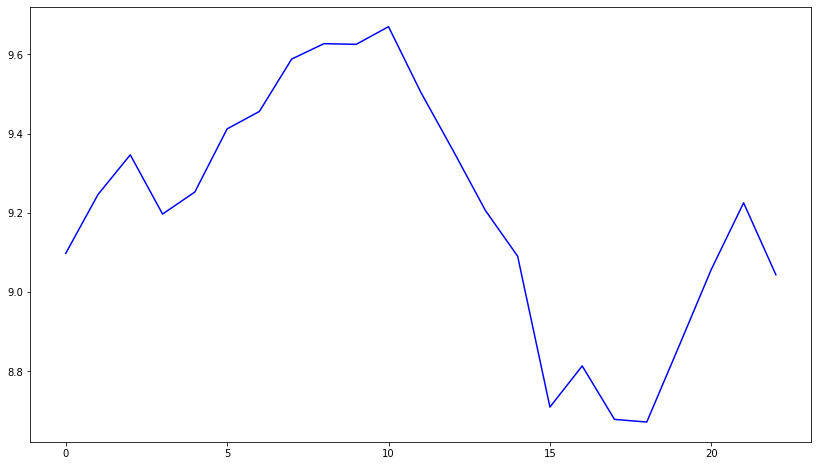

In [93]:
plt.figure(figsize=(14,8))
plt.plot(final_pred,'b', label='out of time prediction')



# End of an assignment